# Decision Tree

Article: https://towardsdatascience.com/understanding-decision-trees-for-classification-python-9663d683c952

Scikit Learn Docs: https://scikit-learn.org/stable/modules/tree.html

Scikit Learn Guide: https://scikit-learn.org/stable/modules/tree.html#tree

## Benefits

- Can be used in both classification and regression.
- Easy to interpret.
- Don't require feature scaling; not sensitive to unstandardized data.

## Caveats

- A very deep classification tree can lead to overfitting.


## Impurity Criterion

Used to find the impurity or randomness of a dataset when split into nodes. They are used to calculate the criteria in which a decision tree node is split.

### Gini Index

- Gini is a metric to measure how often a randomly chosen element would be incorrectly identified.
- It means an attribute with lower Gini index should be preferred.
- Perfect Gini equals 0.5.

The Gini Index is calculated as:

$$
    I_{Gini} = \sum_{i=1}^{C}{p_i(1 - p_i)} = 1 - \sum_{i=1}^{C}{p_i^2}
$$

- $C$ is the total number of classes in a feature.
- $p_i$ is the probability of samples that belong to class $C$ in a node.

### Entropy

- Measurement of impurity in the probability split between two branches.
- Perfect entropy equals 1.

$$
    I_H = \sum_{i=1}^{C}{-p_i\log_2(p_i)}
$$

- The entropy is $0$ if all samples in a node belong to the same class.

## Information Gain

Information gain is used to determine the arrangement of root, branches, and leaves.

$$
    IG(D_p,f) = I(D_p) - \frac{N_{left}}{N}I(D_{left}) - \frac{N_{right}}{N}I(D_{right})
$$

$$
    IG(D_p,f) = I(D_p) - \sum_{i=1}^{m}{\frac{N_i}{N}I(D_i)}
$$

- $f$: feature split on.
- $D_p$: dataset of the parent node.
- $D_{left}$: dataset of the left child node.
- $D_{right}$: dataset of the right child node.
- $I$: impurity criterion (Gini Index or Entropy).
- $N$: total number of samples.
- $N_{left}$: number of samples in the left child node.
- $N_{right}$: number of samples in the right child node.

## Decision Tree Classifier Model

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
data = load_iris()
iris = pd.DataFrame(data['data'], columns=data['feature_names'])
iris['target'] = data['target']
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
X = iris.drop('target', axis=1)
y = iris['target']

In [4]:
X_train, X_test, y_train, y_true = train_test_split(X, y, random_state=0)
X_train.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
61,5.9,3.0,4.2,1.5
92,5.8,2.6,4.0,1.2
112,6.8,3.0,5.5,2.1
2,4.7,3.2,1.3,0.2
141,6.9,3.1,5.1,2.3


In [5]:
clf = DecisionTreeClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, random_state=0)

In [6]:
clf.get_depth()

2

In [7]:
clf.get_n_leaves()

3

In [8]:
clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 0,
 'splitter': 'best'}

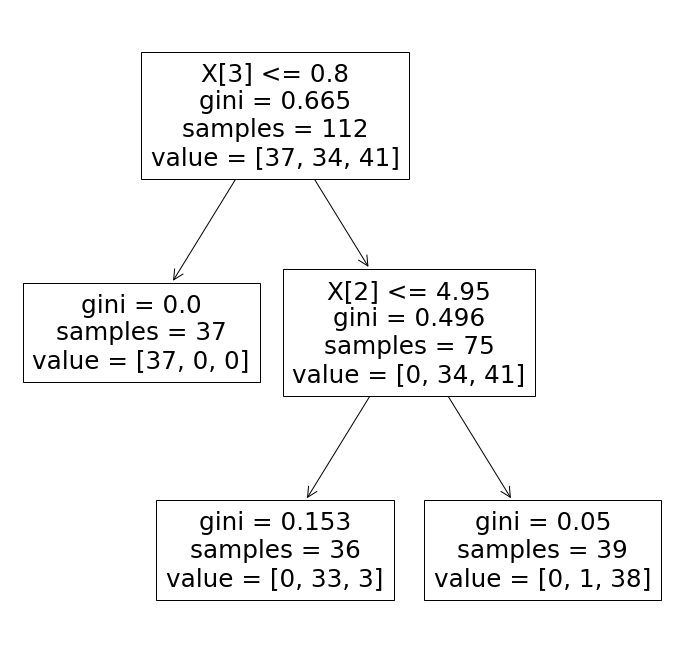

In [9]:
plt.figure(figsize=(12,12))
plot_tree(clf)
plt.show()

## Prediction, Accuracy

In [10]:
y_pred = clf.predict(X_test)

In [11]:
clf.score(X_train, y_train)

0.9642857142857143

## Hyperparameter Tuning

In [12]:
max_depth_range = list(range(1,6))
accuracy = []

for depth in max_depth_range:    
    clf_tuning = DecisionTreeClassifier(max_depth=depth, random_state=0)
    clf_tuning.fit(X_train, y_train)
    score = clf_tuning.score(X_train, y_train)
    accuracy.append(score)

In [13]:
print(max_depth_range)
print(accuracy)

[1, 2, 3, 4, 5]
[0.6964285714285714, 0.9642857142857143, 0.9821428571428571, 1.0, 1.0]


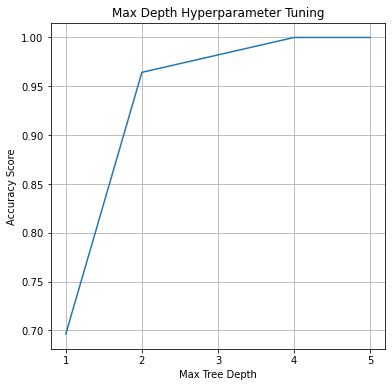

In [14]:
plt.figure(figsize=(6,6))
plt.plot(max_depth_range, accuracy)
plt.xlabel('Max Tree Depth')
plt.xticks(max_depth_range)
plt.ylabel('Accuracy Score')
plt.title('Max Depth Hyperparameter Tuning')
plt.grid(True)
plt.show()

## Interpretation

In [15]:
importances = pd.DataFrame({'feature': X_train.columns, 'importance': clf.feature_importances_})
importances.sort_values('importance', ascending=False)

,feature,importance
3,petal width (cm),0.556334
2,petal length (cm),0.443666
0,sepal length (cm),0.000000
1,sepal width (cm),0.000000
